In [154]:
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
import skimage.segmentation as segmentation
from skimage.color import rgb2gray
from skimage import io, color, measure, filters
import cv2
from skimage import io, color, measure, filters
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, filters, morphology


In [155]:
def line_strell(a,b):
    strell = np.ones((a,b))
    return strell

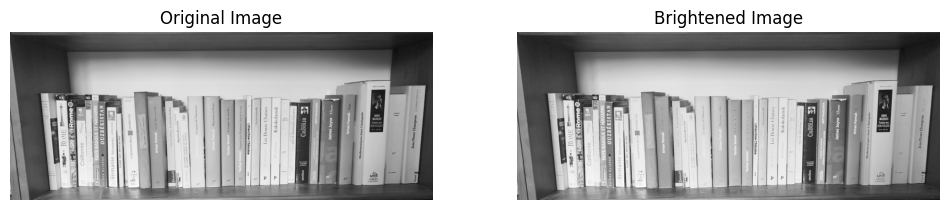

In [156]:

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology, exposure

# Load your image
image = io.imread('/home/hassenekallala/Desktop/athens/project/bookshelf/books8.jpg')
image = color.rgb2gray(image)
strell =  morphology.rectangle(1, 100)
# Create a structuring element (kernel) for morphological operations
selem = np.ones((5, 5), dtype=np.uint8)

# Perform the opening operation (erosion followed by dilation)
opened_image = morphology.opening(image, selem)

# Top-hat transformation (original image - opened image)
top_hat = image - opened_image

# Enhance the brightness by adding the top-hat result to the original image
brightened_image = image + top_hat

# Clip the values to ensure they stay within the valid range [0, 1] for images
brightened_image = np.clip(brightened_image, 0, 1)

# Display the original and brightened images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(brightened_image, cmap='gray')
ax[1].set_title('Brightened Image')
ax[1].axis('off')

plt.show()


In [157]:
image = io.imread('/home/hassenekallala/Desktop/athens/project/bookshelf/books8.jpg')


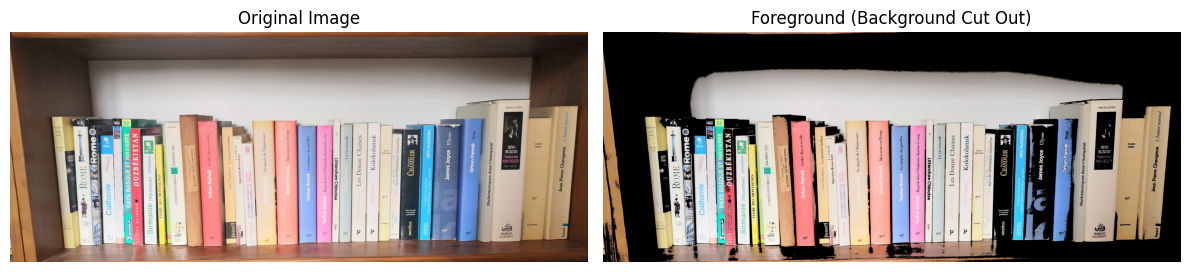

In [158]:
import numpy as np
from skimage import io, color, filters
from skimage.draw import rectangle
import matplotlib.pyplot as plt

# Step 1: Read the image
image = io.imread('/home/hassenekallala/Desktop/athens/project/bookshelf/books8.jpg')

# Step 2: Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Step 3: Apply a threshold to create a binary mask
threshold_value = 0.5  # You can adjust this threshold value
binary_mask = gray_image > threshold_value

# Step 4: Use the binary mask to extract the foreground
# Create an image where the background is set to black
foreground = np.zeros_like(image)
foreground[binary_mask] = image[binary_mask]

# Step 5: Display the original image and the foreground (background cut out)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

# Show foreground with background cut out
ax[1].imshow(foreground)
ax[1].set_title("Foreground (Background Cut Out)")
ax[1].axis("off")

plt.tight_layout()
plt.show()

# Optional: Save the result


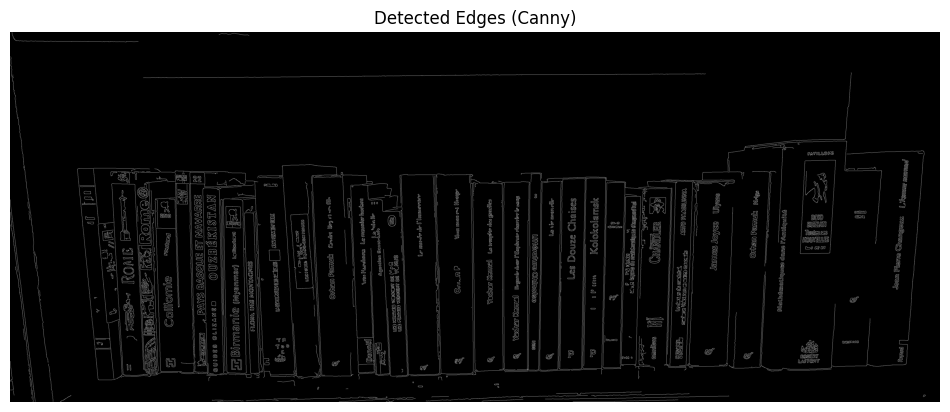

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature, transform

# Load the image
#image = io.imread('/home/hassenekallala/Desktop/athens/project/bookshelf/books8.jpg')
 
# Convert the image to grayscale
image = foreground

# Apply Sobel edge detection to find vertical edges
# Sobel operator for vertical edges (derivative along x-axis)
sobel_vertical = filters.sobel_h(gray_image)

# Optional: Apply Canny edge detection
edges = feature.canny(gray_image, sigma=2)

# Optional: Apply Hough Transform to detect lines in the edges
# Detect straight lines in the edge-detected image
hough_space, angles, distances = transform.hough_line(edges)

# Display the results
plt.figure(figsize=(12, 6))


# Plot original image with detected edges
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges (Canny)'), plt.axis('off')

plt.show()


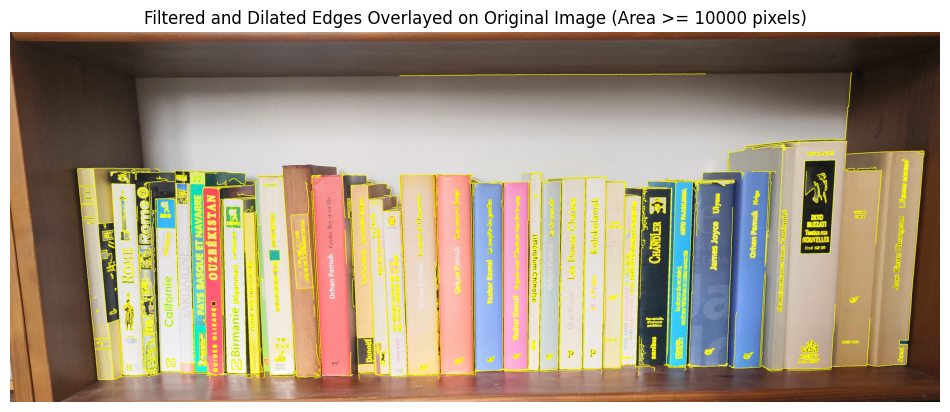

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology
image = io.imread('/home/hassenekallala/Desktop/athens/project/bookshelf/books8.jpg')

# Define the area threshold (you can adjust this value)
area_threshold = 10000  # Example: Only consider regions with area >= 500 pixels

# Create a copy of the original image to overlay edges
overlay_image = np.copy(image)

# Normalize the edges to [0, 255] and create a mask
edge_mask = (edges * 255).astype(np.uint8)

# Dilation to make edges thicker (3x the width)
dilated_edges = morphology.dilation(edge_mask, morphology.square(3))  # Use a 3x3 square kernel

# Label connected components in the dilated edge-detected image
labels = measure.label(dilated_edges)

# Get properties of each connected component
regions = measure.regionprops(labels)

# Overlay edges in yellow, but only for regions with area >= area_threshold
for region in regions:
    # Get the area of the region
    area = region.area
    
    # Apply the condition: area should be >= area_threshold
    if area >= area_threshold:
        # Get the bounding box dimensions (minr, minc, maxr, maxc)
        minr, minc, maxr, maxc = region.bbox
        
        # Ensure the region's bounds are within the image size by clipping each bound individually
        minr = max(minr, 0)
        minc = max(minc, 0)
        maxr = min(maxr, overlay_image.shape[0])
        maxc = min(maxc, overlay_image.shape[1])
        
        # Apply the dilated edge mask to the region in the overlay image
        overlay_image[minr:maxr, minc:maxc][dilated_edges[minr:maxr, minc:maxc] > 0] = [255, 255, 0]  # Yellow for edges

# Display the overlay
plt.figure(figsize=(12, 6))
plt.imshow(overlay_image)
plt.title(f'Filtered and Dilated Edges Overlayed on Original Image (Area >= {area_threshold} pixels)')
plt.axis('off')
plt.show()


Width: 618, Height: 50, Area: 2080.0
Width: 150, Height: 14, Area: 514.0
Width: 185, Height: 1492, Area: 5653.0
Width: 2200, Height: 1478, Area: 92646.0
Width: 2740, Height: 22, Area: 8503.0
Width: 3, Height: 4, Area: 12.0
Width: 509, Height: 503, Area: 3243.0
Width: 4, Height: 3, Area: 12.0
Width: 9, Height: 11, Area: 68.0
Width: 953, Height: 1075, Area: 13257.0
Width: 30, Height: 19, Area: 411.0
Width: 31, Height: 19, Area: 416.0
Width: 14, Height: 17, Area: 163.0
Width: 8, Height: 17, Area: 110.0
Width: 13, Height: 17, Area: 141.0
Width: 27, Height: 17, Area: 333.0
Width: 27, Height: 9, Area: 97.0
Width: 32, Height: 59, Area: 1059.0
Width: 175, Height: 458, Area: 3709.0
Width: 468, Height: 1043, Area: 6737.0
Width: 93, Height: 15, Area: 365.0
Width: 492, Height: 1033, Area: 39213.0
Width: 909, Height: 1020, Area: 57530.0
Width: 38, Height: 10, Area: 158.0
Width: 118, Height: 465, Area: 3412.0
Width: 83, Height: 156, Area: 1742.0
Width: 121, Height: 61, Area: 2066.0
Width: 22, Height

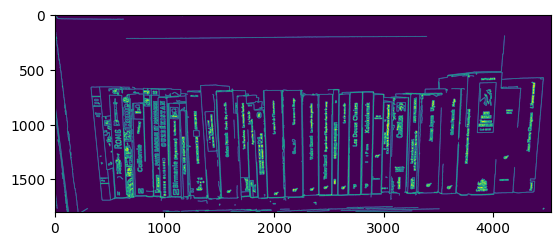

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import measure, morphology, io
from skimage.draw import rectangle_perimeter

# Define the area threshold (you can adjust these values)
area_threshold = 5000  # Minimum area to consider
max_area = 50000  # Maximum area to consider

# Create a copy of the original image for overlaying
overlay_image = np.copy(image)

# Normalize the edges to [0, 255] and create a mask
edge_mask = (edges * 255).astype(np.uint8)

# Dilation to make edges thicker (3x the width)
dilated_edges = morphology.dilation(edge_mask, morphology.square(3))  # Use a 3x3 square kernel
plt.imshow(dilated_edges)
# Label connected components in the dilated edge-detected image
labels = measure.label(dilated_edges)

# Get properties of each connected component
regions = measure.regionprops(labels)

# Create the directory to save the edges if it does not exist
output_dir = '/home/hassenekallala/Desktop/athens/project/bookshelf/edges'
os.makedirs(output_dir, exist_ok=True)

# Loop through the regions and save each edge
for i, region in enumerate(regions):
    # Get the area of the region
    area = region.area

    # Get the bounding box dimensions (minr, minc, maxr, maxc)
    minr, minc, maxr, maxc = region.bbox
    width = maxc - minc
    height = maxr - minr

    # Print region details
    print(f"Width: {width}, Height: {height}, Area: {area}")

    # Apply the condition: area should be within the threshold range
    if area_threshold <= area <= max_area:
        # Ensure the region's bounds are within the image size by clipping each bound individually
        minr = max(minr, 0)
        minc = max(minc, 0)
        maxr = min(maxr, overlay_image.shape[0])
        maxc = min(maxc, overlay_image.shape[1])
        
        # Crop the region from the original image
        cropped_region = image[minr:maxr, minc:maxc]
        
        # Save the cropped region with a unique filename
        edge_filename = os.path.join(output_dir, f'edge_{i+1}.jpg')
        io.imsave(edge_filename, cropped_region)
        
        # Draw bounding boxes and add a label to the overlay image
        rr, cc = rectangle_perimeter(start=(minr, minc), end=(maxr, maxc), shape=image.shape)
        overlay_image[rr, cc] = [255, 0, 0]  # Red rectangle

        # Annotate the region on the overlay image
 
